In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Load Data

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualization to check for null values

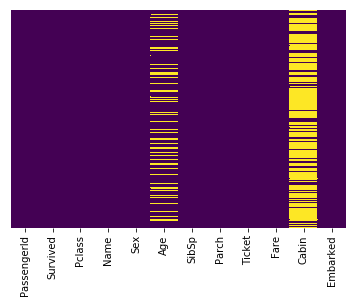

In [4]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

### Exploratory Data Analysis

In [5]:
sns.set_style('whitegrid')

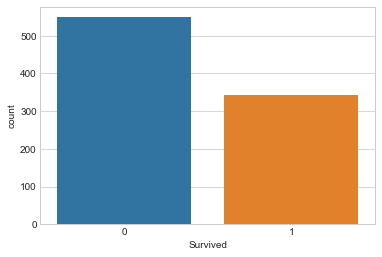

In [6]:
sns.countplot(x='Survived', data = train)

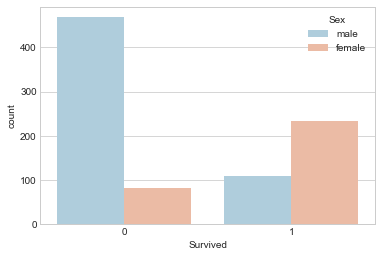

In [7]:
sns.countplot(x='Survived', data = train, hue = 'Sex', palette='RdBu_r')

In [8]:
sns.set_style('whitegrid')

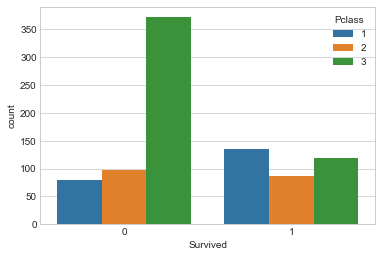

In [9]:
sns.countplot(x='Survived', data = train, hue = 'Pclass')

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


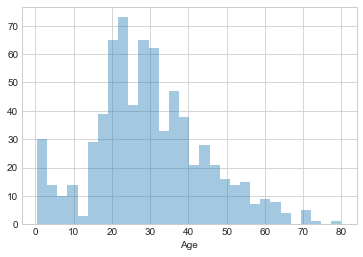

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins = 30)

- the histrogram shows a bimodal distribution

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


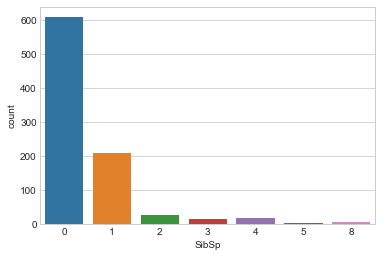

In [12]:
sns.countplot(x='SibSp', data = train)

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


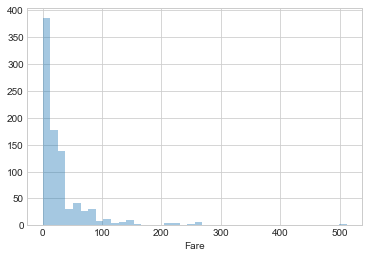

In [13]:
sns.distplot(train['Fare'].dropna(), kde=False, bins = 40)

In [ ]:
#for interactive graph
#import sys
#!{sys.executable} -m pip install cufflinks
#import cufflinks as cf

In [ ]:
#cf.go_offline()
#train['Fare'].iplot(kinds = 'hist', bins = 30)

### Clean Data

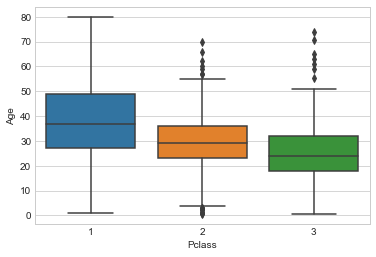

In [15]:
sns.boxplot(x='Pclass', y='Age', data = train)

In [21]:
train['Age'].groupby(train['Pclass']).mean()

Pclass
1    38.062130
2    29.825163
3    24.824684
Name: Age, dtype: float64

In [22]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [23]:
train['Age'] = train[['Age', 'Pclass']].apply(inpute_age, axis=1)

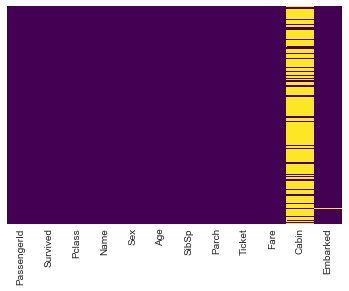

In [24]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

- too many missing values for Cabin so I will need to drop it

In [25]:
train.drop('Cabin', axis=1, inplace=True)

In [27]:
train.dropna(inplace = True)

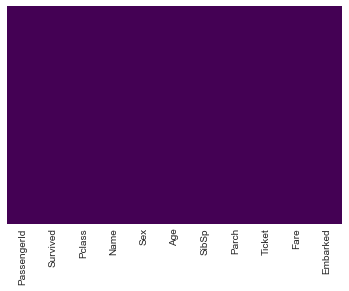

In [28]:
#check for na
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

### Create dummy variables

In [32]:
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [33]:
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [35]:
train = pd.concat([train, sex, embark], axis = 1)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [37]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [39]:
train.drop('PassengerId', axis=1, inplace=True)

In [40]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [42]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

In [150]:
from sklearn.cross_validation import train_test_split

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
logmodel = LogisticRegression()

In [154]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
predictions = logmodel.predict(X_test)

In [156]:
from sklearn.metrics import classification_report

In [157]:
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
confusion_matrix(Y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [160]:
#Calculate accuracy
accuracy = (148+68)*100/(148+15+36+68)
print('The accuracy of this test is {}%'.format(accuracy))

The accuracy of this test is 80.89887640449439%


### Clean test data to make predictions

In [166]:
test = pd.read_csv('titanic_test.csv')

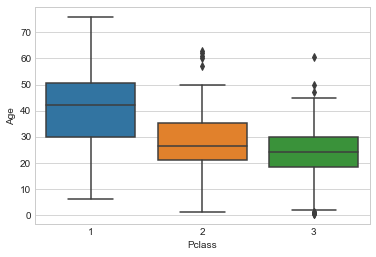

In [167]:
sns.boxplot(x='Pclass', y='Age', data = test)

In [168]:
test['Age'].groupby(test['Pclass']).mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [169]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [170]:
test['Age'] = test[['Age', 'Pclass']].apply(inpute_age, axis=1)

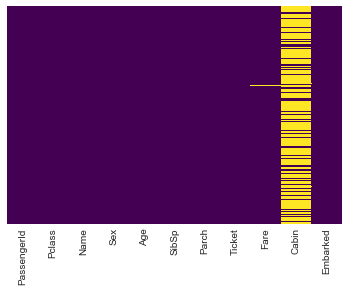

In [171]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [172]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


- need to delete index 152 because the Fare is unknown and will affect my prediction

In [173]:
test.drop([152], axis = 0, inplace = True)

In [174]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [175]:
x_test = test.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)

In [176]:
sex_test = pd.get_dummies(test['Sex'], drop_first= True)

In [177]:
embark_test = pd.get_dummies(test['Embarked'], drop_first= True)

In [178]:
x_test = pd.concat([x_test, sex_test, embark_test], axis = 1)

In [179]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,3,female,47.0,1,0,7.0000,S,0,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1,0
3,3,male,27.0,0,0,8.6625,S,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1


In [180]:
x_test = x_test.drop(['Sex', 'Embarked'], axis = 1)

In [181]:
y_test = logmodel.predict(x_test)

In [182]:
y_test = pd.DataFrame(y_test)

In [183]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [184]:
test = pd.concat([test, y_test], axis = 1)

In [185]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,0.0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,0.0
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q,0.0
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S,0.0
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S,1.0


In [186]:
test.rename(columns={0: "Survived"}, inplace = True)

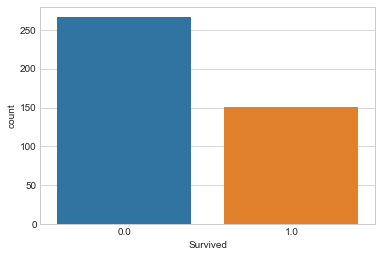

In [189]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = test)

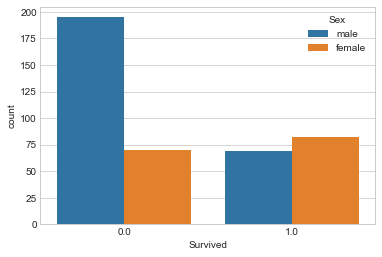

In [190]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = test, hue='Sex')